In [1]:
# from segment_anything import build_sam, SamPredictor, SamAutomaticMaskGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
# img = cv2.imread("movenet_files\\toastmasters_test_image.JPG")

## Getting Pose2Seg Mask Output

In [3]:
from modeling.build_model import Pose2Seg
# from MoveNet_Model import MoveNet_Predictor
import torch
from torchvision import transforms
from datasets2.CocoDatasetInfo import CocoDatasetInfo, annToMask
import cv2

/home/kevinw/miniconda3/envs/pbd/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
# ImageRoot = './data/coco2017/val2017'
# AnnoFile = './data/coco2017/annotations/person_keypoints_val2017_pose2seg.json'
ImageRoot = './data/OCHuman/images'
AnnoFile = './data/OCHuman/annotations/ochuman_coco_format_val_range_0.00_1.00.json'
datainfos = CocoDatasetInfo(ImageRoot, AnnoFile, onlyperson=True, loadimg=True)
rawdata = datainfos[5]
img = rawdata['data']
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # change to RGB
image_id = rawdata['id']

height, width = img.shape[0:2]
gt_kpts = np.float32(rawdata['gt_keypoints']).transpose(0, 2, 1) # (N, 17, 3)
gt_segms = rawdata['segms']
gt_masks = np.array([annToMask(segm, height, width) for segm in gt_segms])

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [52]:
print('===========> loading model <===========')
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Pose2Seg().to(device)
model.init("snapshot/release_base_2023-04-17_03_48_15/best_model.pkl")
model.eval()
print()

===========> loading model <===========



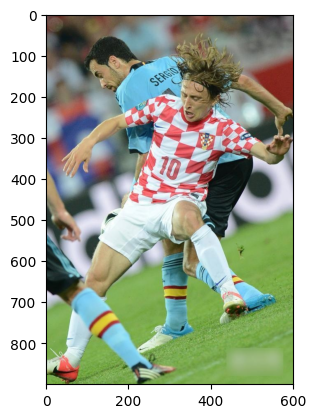

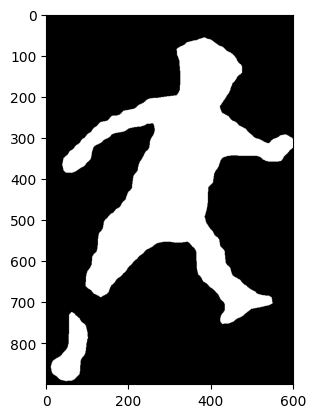

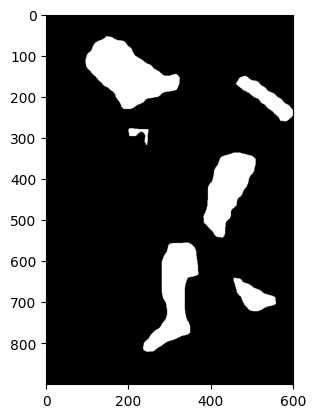

In [53]:
# for i in range(5):
i=2
rawdata = datainfos[i]
img = rawdata['data']
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # change to RGB
image_id = rawdata['id']
height, width = img.shape[0:2]
gt_kpts = np.float32(rawdata['gt_keypoints']).transpose(0, 2, 1) # (N, 17, 3)
gt_segms = rawdata['segms']
gt_masks = np.array([annToMask(segm, height, width) for segm in gt_segms])
output = model([img], [gt_kpts])
plt.imshow(img)
plt.show()
for j in output[0]:
    plt.imshow(j,cmap='gray')
    plt.show()
    

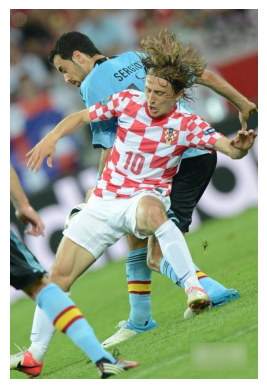

In [29]:
output = plt.imshow(img)
plt.axis('off')
plt.savefig("test.png",bbox_inches='tight')

===========> loading model <===========


/home/kevinw/miniconda3/envs/pbd/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/kevinw/miniconda3/envs/pbd/lib/python3.11/site-packages/safetensors/torch.py:99: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(filename, framework="pt", device=device) as f:
/home/kevinw/miniconda3/envs/pbd/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matte

In [7]:
# one_kpt = np.expand_dims(gt_kpts[2],axis=0) # expand dims to make one_kpt 3D
# from modeling.build_model import Pose2Seg
output = model([img], [gt_kpts])

/home/kevinw/miniconda3/envs/pbd/lib/python3.11/site-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/kevinw/miniconda3/envs/pbd/lib/python3.11/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/kevinw/miniconda3/envs/pbd/lib/python3.11/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [8]:
len(output[0]),type(output),output[0][0].shape

(1, list, (599, 900))

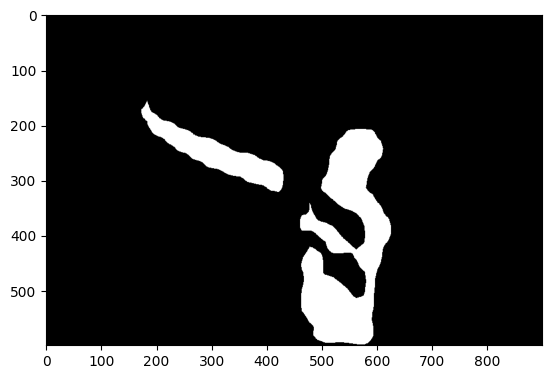

In [9]:
for i in output[0]:
    plt.imshow(i,cmap='gray')
    plt.show()


IndexError: list index out of range

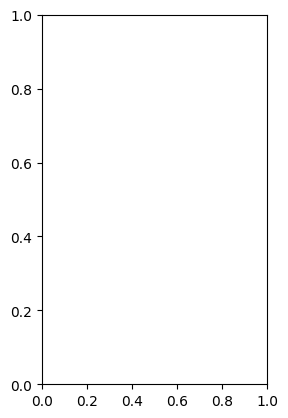

In [10]:
# plt.subplot(1,2,1)
# plt.imshow(output[0][2],cmap='gray')
# plt.subplot(1,2,2)
# plt.imshow(img)
# plt.show()

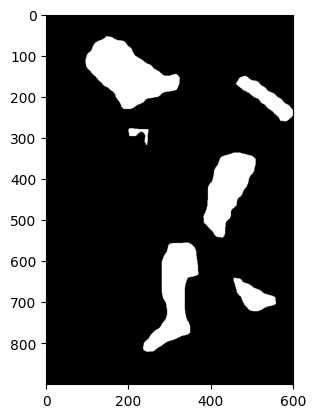

In [54]:
plt.imshow(output[0][1],cmap='gray')
plt.imsave("vis/socore1pose2seg_trans_mask.jpg",output[0][1],cmap='gray')
plt.show()

In [ ]:
np.unique(output[0][0])

array([0, 1], dtype=uint8)

In [ ]:
output[0][0].shape,img.shape

((427, 640), (427, 640, 3))

In [ ]:
lama_path = "C:/Users/Aditya Ojha/Music/CV_Graduate/lama/"
plt.imsave(lama_path+"testing_imgs/boat.jpg",img)
plt.imsave(lama_path+"testing_masks/boat_mask.jpg",output[0][2],cmap='gray')

In [ ]:
np.save(lama_path+"testing_masks/boat_mask",output[0][2])

In [ ]:
# to run the model we need to give imgs and keypoints
img = plt.imread("movenet_files\\jumping_photobomber.JPG") # image
mdl = MoveNet_Predictor() # init movenet model
keypoints_with_scores = mdl.predict(img) # make predictions
print(keypoints_with_scores)

[[[[0.36102676 0.77530766 0.61860615]
   [0.33815402 0.78772825 0.5066408 ]
   [0.3375568  0.76188636 0.40609586]
   [0.34633404 0.8095421  0.36635137]
   [0.3387183  0.7389228  0.36369735]
   [0.46167633 0.8363925  0.57365066]
   [0.46249408 0.70996517 0.43197343]
   [0.5879037  0.8452918  0.48104206]
   [0.5795212  0.71549386 0.27275306]
   [0.66981095 0.83578503 0.37348986]
   [0.7009749  0.7380389  0.51775265]
   [0.7135605  0.80571693 0.44301647]
   [0.6916746  0.7096161  0.2550012 ]
   [0.89541626 0.8111083  0.40132374]
   [0.89065    0.72504556 0.20332412]
   [0.9880488  0.8170468  0.27667555]
   [0.9853558  0.69314736 0.20210792]]]]


In [ ]:
# pose2seg's draw kpts doesn't work
def draw_keypoints(frame, keypoints, confidence):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    for kp in shaped:
        ky, kx, conf = kp
        if conf > confidence:
            cv2.circle(frame,(int(kx),int(ky)), 4,(0,255,0),-1)
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

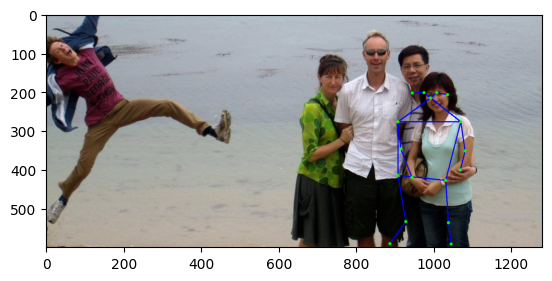

In [ ]:
draw_img = img.copy()
draw_connections(draw_img,keypoints_with_scores,EDGES,0.2)
draw_keypoints(draw_img,keypoints_with_scores,0.2)
plt.imshow(draw_img)

In [ ]:
tmp_img = img/np.max(img)
tmp_img = np.transpose(tmp_img,(2,0,1))
tmp_tensor = torch.Tensor(tmp_img)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                std=[0.229, 0.224, 0.225])
tmp_tensor = normalize(tmp_tensor)
# back to channels at the end
tmp_tensor = torch.permute(tmp_tensor,(1,2,0))
# make into numpy 
tmp_img = tmp_tensor.numpy()
tmp_img.shape,keypoints_with_scores.shape

((600, 1280, 3), (1, 1, 17, 3))

In [ ]:
new_keypoints = np.zeros((1,17,3))
for idx in range(len(keypoints_with_scores[0][0])):
    y,x,conf = keypoints_with_scores[0][0][idx]
    if conf <= 0.2:
        new_keypoints[0][idx] = np.array([0,0,0])
    else:
        new_keypoints[0][idx] = np.array([y,x,2])
new_keypoints

array([[[0.36102676, 0.77530766, 2.        ],
        [0.33815402, 0.78772825, 2.        ],
        [0.33755681, 0.76188636, 2.        ],
        [0.34633404, 0.80954212, 2.        ],
        [0.3387183 , 0.73892277, 2.        ],
        [0.46167633, 0.83639252, 2.        ],
        [0.46249408, 0.70996517, 2.        ],
        [0.58790368, 0.84529179, 2.        ],
        [0.57952118, 0.71549386, 2.        ],
        [0.66981095, 0.83578503, 2.        ],
        [0.70097488, 0.7380389 , 2.        ],
        [0.71356052, 0.80571693, 2.        ],
        [0.69167459, 0.70961612, 2.        ],
        [0.89541626, 0.81110829, 2.        ],
        [0.89064997, 0.72504556, 2.        ],
        [0.98804879, 0.81704682, 2.        ],
        [0.98535579, 0.69314736, 2.        ]]])

In [ ]:
y, x, c = img.shape
shaped = np.squeeze(np.multiply(new_keypoints, [y,x,1]))
shaped = shaped.astype(int)
shaped[:,-1] = 2
shaped = shaped.astype(float)
shaped

array([[ 216.,  992.,    2.],
       [ 202., 1008.,    2.],
       [ 202.,  975.,    2.],
       [ 207., 1036.,    2.],
       [ 203.,  945.,    2.],
       [ 277., 1070.,    2.],
       [ 277.,  908.,    2.],
       [ 352., 1081.,    2.],
       [ 347.,  915.,    2.],
       [ 401., 1069.,    2.],
       [ 420.,  944.,    2.],
       [ 428., 1031.,    2.],
       [ 415.,  908.,    2.],
       [ 537., 1038.,    2.],
       [ 534.,  928.,    2.],
       [ 592., 1045.,    2.],
       [ 591.,  887.,    2.]])

In [ ]:
np.expand_dims(shaped,axis=0).shape

(1, 17, 3)

In [ ]:
# batchimgs: a list of array (H, W, 3) images
# batchkpts: a list of array (m, 17, 3) keypoints, m is number of people
batchimgs = [tmp_img]
batchkpts = [np.expand_dims(shaped,axis=0)] # now the shape is 1,17,3

In [ ]:
output = model(batchimgs,batchkpts)
output = np.array(output)
output.shape

c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 256, 128, 128])


c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:4289: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


(1, 1, 600, 1280)

In [ ]:
np.max(output[0][0]),np.min(output[0][0])

(0, 0)

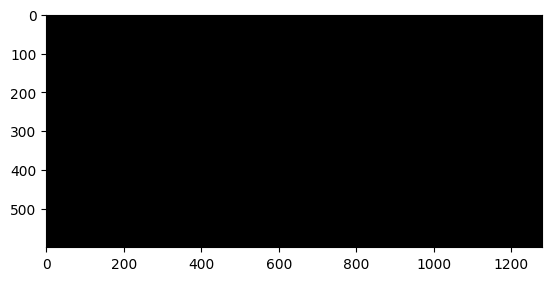

In [ ]:
plt.imshow(output[0][0],cmap="gray")

## Getting SAM Mask Output

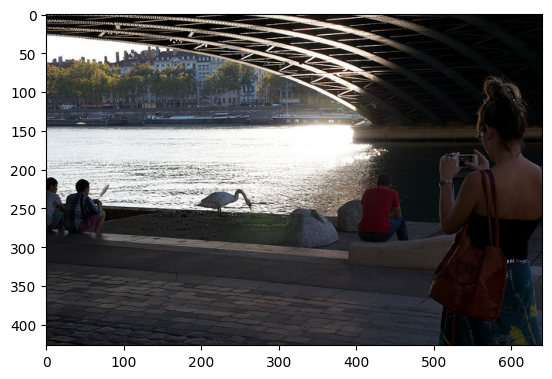

In [ ]:
# img = cv2.imread("movenet_files\\people_crowd_fancy.JPG")
plt.imshow(img)
plt.show()

In [ ]:
mask_generator = SamAutomaticMaskGenerator(build_sam(checkpoint="sam_vit_h_4b8939.pth"))
masks = mask_generator.generate(img) # 9 mins for inference

In [ ]:
# RLE- Run Length Encoding
# RLE to mask converter from : https://www.kaggle.com/code/robertkag/rle-to-mask-converter
def rleToMask(rleString,height,width):
    rows,cols = height,width
    rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
    rlePairs = np.array(rleNumbers).reshape(-1,2)
    img = np.zeros(rows*cols,dtype=np.uint8)
    for index,length in rlePairs:
        index -= 1
        img[index:index+length] = 255
    img = img.reshape(cols,rows)
    img = img.T
    return img

In [ ]:
mask_dict = masks[7]
mask_dict.keys()

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])

In [ ]:
seg_example = mask_dict["segmentation"]
type(seg_example),seg_example.shape

(numpy.ndarray, (2320, 3088))

In [ ]:
stacked_mask = np.stack((seg_example,)*3, axis=-1)
stacked_mask.shape

(2320, 3088, 3)

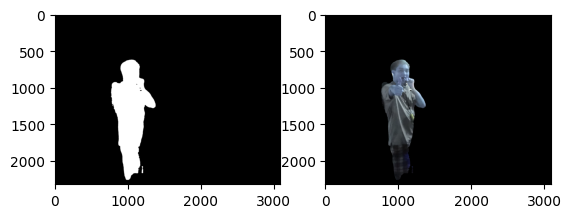

In [ ]:
masked_img = np.multiply(stacked_mask,img)
fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(seg_example,cmap="gray")
ax[1].imshow(masked_img)
plt.show()

In [ ]:
plt.imsave("marc_mask.png",seg_example)

In [ ]:
# need a function that can find a mask given a single point the user puts in
# since the model can use prompting we can use multiple clicks to refine what mask we want
print("Building Model")
predictor = SamPredictor(build_sam(checkpoint="sam_vit_h_4b8939.pth"))
print("Creating Image Embeddings")
predictor.set_image(img) # 1 m 40 sec for loading image embedding

Building Model
Creating Image Embeddings


Start of Interactive Prompting Session


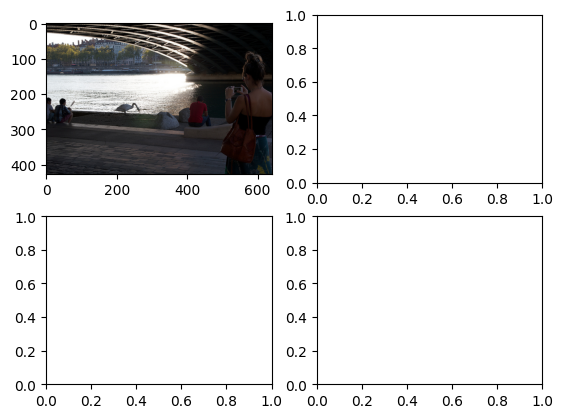

[[450 250]]
<class 'numpy.ndarray'> (3, 427, 640)


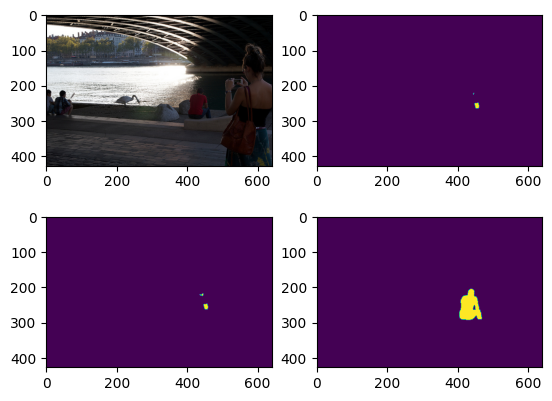

End of Interactive Mask-Prompting Session


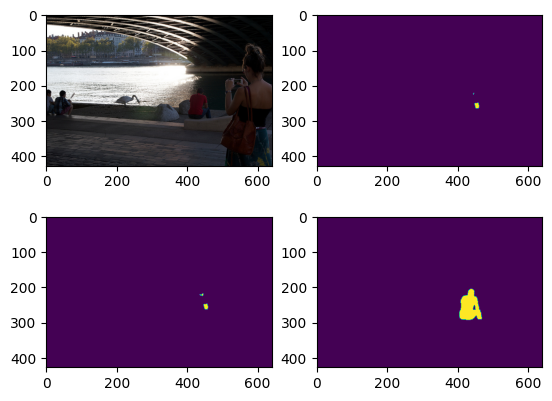

In [ ]:
print("Start of Interactive Prompting Session")
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0][0].imshow(img)
display.display(plt.gcf())
user = input("What coordinate for click?")
pt_coor = []
pt_label = []
while user != "n":
    # extract coordinates
    coordinates = user.split(",")
    x,y = int(coordinates[0]),int(coordinates[1])
    pt_coor.append([x,y])
    print(np.array(pt_coor))
    pt_label.append(1)
    # run prediction
    masks,_,_ = predictor.predict(point_coords=np.array(pt_coor),
                                  point_labels=np.array(pt_label))
    print(type(masks),masks.shape)
    ax[0][0].imshow(img)
    ax[0][1].imshow(masks[0])
    ax[1][0].imshow(masks[1])
    ax[1][1].imshow(masks[2])
    display.display(plt.gcf())
    user = input("What coordinate for click?")
print("End of Interactive Mask-Prompting Session")

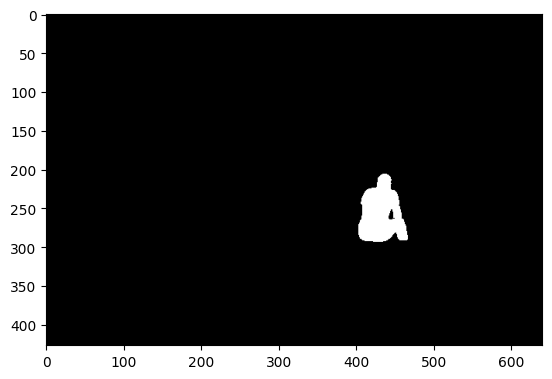

In [ ]:
plt.imshow(masks[2],cmap='gray')
plt.imsave("SAM_output/boat_SAM_mask.jpg",masks[2],cmap='gray')
plt.show()

## Original Notebook

In [ ]:
from cluster_pose import cluster
%matplotlib inline

loading annotations into memory...


  0%|          | 0/56599 [00:00<?, ?it/s]

Done (t=3.48s)
creating index...
index created!


100%|██████████| 56599/56599 [01:01<00:00, 921.07it/s]


data to be clustered: (232042, 17, 3)


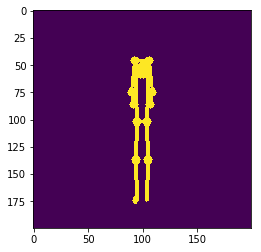

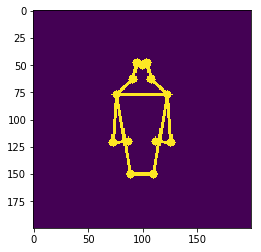

cluster() done.


(array([[0.5       , 0.25507537, 1.3332961 , 0.5016225 , 0.27945724,
         1.1501867 , 0.49837807, 0.27945727, 1.1501867 , 0.50633913,
         0.29188576, 1.062223  , 0.49366152, 0.29188576, 1.062223  ,
         0.5305429 , 0.23062557, 1.889526  , 0.46945313, 0.23062557,
         1.889526  , 0.54733425, 0.37987825, 1.630152  , 0.45267108,
         0.37987822, 1.630152  , 0.5358264 , 0.43009064, 1.510881  ,
         0.46417445, 0.4300906 , 1.510881  , 0.52135867, 0.51188815,
         1.914113  , 0.47864097, 0.51188815, 1.914113  , 0.52615595,
         0.68717086, 1.8920435 , 0.47384372, 0.68717086, 1.8920435 ,
         0.5235441 , 0.8727692 , 1.7318499 , 0.47645658, 0.87276924,
         1.7318499 ],
        [0.5       , 0.2530518 , 1.771833  , 0.52047735, 0.2444533 ,
         1.6309524 , 0.47952464, 0.2444533 , 1.6309524 , 0.54382694,
         0.3153666 , 1.1965296 , 0.45617405, 0.3153666 , 1.1965296 ,
         0.61535084, 0.38901666, 1.8483154 , 0.384646  , 0.3890166 ,
         1.8

In [ ]:
cluster(dataset = 'coco', cat_num = 2, vis_threshold = 0.4, 
        minpoints = 8,  save_file = None, visualize=True)

loading annotations into memory...


  0%|          | 0/56599 [00:00<?, ?it/s]

Done (t=3.47s)
creating index...
index created!


100%|██████████| 56599/56599 [01:00<00:00, 932.09it/s]


data to be clustered: (232042, 17, 3)


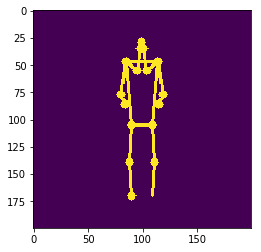

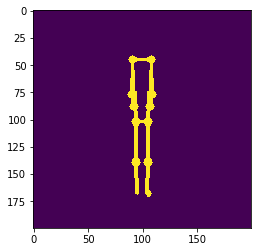

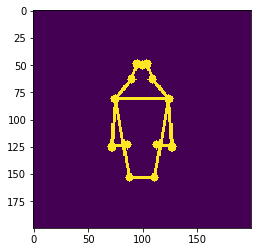

cluster() done.


(array([[0.49999997, 0.14743559, 1.9604067 , 0.5058377 , 0.17530145,
         1.7092475 , 0.4941621 , 0.17530143, 1.7092475 , 0.5212896 ,
         0.27884376, 1.1505946 , 0.4787104 , 0.27884373, 1.1505946 ,
         0.5702254 , 0.23785739, 1.933151  , 0.4297731 , 0.23785737,
         1.933151  , 0.59947026, 0.3869742 , 1.7167064 , 0.4005297 ,
         0.3869742 , 1.7167064 , 0.5760545 , 0.43397716, 1.6798968 ,
         0.42394233, 0.4339772 , 1.6798968 , 0.54749644, 0.52782863,
         1.9189897 , 0.4525023 , 0.5278286 , 1.9189897 , 0.5556776 ,
         0.69724154, 1.8930435 , 0.4443216 , 0.6972414 , 1.8930435 ,
         0.5454395 , 0.8541755 , 1.6422433 , 0.45456135, 0.8541756 ,
         1.6422433 ],
        [0.5       , 0.4667606 , 0.1224482 , 0.49637675, 0.4757405 ,
         0.10841089, 0.50362355, 0.4757405 , 0.10841089, 0.48010612,
         0.31671977, 0.9086713 , 0.5198936 , 0.31671977, 0.9086713 ,
         0.45818663, 0.2283892 , 1.8012371 , 0.54181284, 0.22838919,
         1.8

In [ ]:
cluster(dataset = 'coco', cat_num = 3, vis_threshold = 0.4, 
        minpoints = 8,  save_file = None, visualize=True)